In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import sparse
from scipy import linalg
import copy
import iMPS
#from scipy.sparse import linalg
import funcs

In [ ]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dim2s=[]
dim1s=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
for h in np.arange(0.4,0.5,0.01):   
    
    h1 = h
    h2 = 0
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.svd_threshold =1e-10
    MPS.max_bond =20
    MPS.construct_from_tensor_list([B])
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method_single(MPS,MPO,max_bond=20)
    MPS_power.update(100)
    


    
    
    T3 = np.zeros([1,1,4,4])
    T3[0,0,:,:] = np.kron(X,X)
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    lam4s.append(lam4)
    

    dim1s.append(MPS.chi[0])
    
    
    
   
lam4s = np.abs(lam4s)
lam1s = np.abs(lam1s)
lam2s = np.abs(lam2s)
lam3s = np.abs(lam3s)

print(lam1s)
print(lam4s)
print(dim1s)
print(dim2s)

In [4]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dim2s=[]
dim1s=[]
dim3s=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])

rng = list(np.arange(0,0.4,0.04))
rng = rng+list(np.arange(0.401,0.5,0.002))
rng = rng+list(np.arange(0.5,0.8,0.04))
for h in rng:   
    
    h1 = h
    h2 = 0
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.svd_threshold =1e-12
    MPS.max_bond = 20
    MPS.construct_from_tensor_list([B])
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    
    MPS_power = iMPS.MPS_power_method(MPS,MPO,max_bond=20)
    MPS_power.update(100)
    

    
    MPS_two_site = iMPS.MPS_singlesite_update(MPS,MPO,20)
        
    MPS_two_site.svd_threshold=1e-10
    MPS_two_site.MPS2.svd_threshold=1e-10   
    #MPS_two_site.init_MPS2(20)
        
    MPS_two_site.MPS2 = copy.deepcopy(MPS)
    MPS_two_site.init_env()
    MPS_two_site.update_MPS2(loop=10)
    
    if h>0.4 and h <0.5:
        loop1 = 30
        loop2 = 10
    else:
        loop1 = 1
    for i in range(loop1):
        
        MPS4 = copy.deepcopy(MPS_two_site.MPS2)
        MPS4.svd_threshold =1e-10
        MPS4.site_canonical()
        
        MPS_power = iMPS.MPS_power_method(MPS4,MPO,max_bond=20)
        MPS_power.update(1)
        
        
        MPS_two_site = iMPS.MPS_singlesite_update(MPS4,MPO,10)
        
        MPS_two_site.svd_threshold=1e-10
        MPS_two_site.MPS2.svd_threshold=1e-10
        MPS_two_site.MPS2.max_bond = 10
        MPS_two_site.init_MPS2(15)
        
        MPS_two_site.MPS2 = copy.deepcopy(MPS4)
        MPS_two_site.MPS2.max_bond = 10
        MPS_two_site.init_env()
        MPS_two_site.update_MPS2(loop=10)
        
        
        
    """MPS_two_site2 = iMPS.MPS_singlesite_update(MPS4,MPO,20)
        
        MPS_two_site2.svd_threshold=1e-10
        MPS_two_site2.MPS2.svd_threshold=1e-10
        MPS_two_site2.MPS2.max_bond = 20
        MPS_two_site2.init_MPS2(15)
        
        MPS_two_site2.MPS2 = copy.deepcopy(MPS4)
        MPS_two_site2.init_env()
        MPS_two_site2.update_MPS2(loop=10)"""
        

    
    
    
    T3 = np.zeros([1,1,4,4])
    T3[0,0,:,:] = np.kron(X,X)
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    lam1s.append(lam4)
    

    strap4 = iMPS.strap(MPS_two_site.MPS2,MPO4,MPS_two_site.MPS2)
    lam4 = strap4.calculate_eig()
    lam2s.append(lam4)
    
    
    """strap4 = iMPS.strap(MPS_two_site2.MPS2,MPO4,MPS_two_site2.MPS2)
    lam4 = strap4.calculate_eig()
    lam3s.append(lam4)
    
    dim3s.append(MPS_two_site2.MPS2.chi[0])"""
    dim2s.append(MPS_two_site.MPS2.chi[0])
    dim1s.append(MPS.chi[0])
    
    
    
   
lam4s = np.abs(lam4s)
lam1s = np.abs(lam1s)


print(lam1s)
print(lam2s)
print(dim1s)
print(dim2s)

[1.         1.         1.         1.         1.         1.
 1.         1.         0.99999987 0.99998226 0.99810896 0.99775515
 0.99734253 0.99763292 0.9971702  0.99662851 0.99599744 0.99526598
 0.99442273 0.99458199 0.9935806  0.99243112 0.991121   0.98963872
 0.9893366  0.98754974 0.98555514 0.98334807 0.98092698 0.97829358
 0.9768435  0.9737896  0.97053311 0.96708776 0.96346837 0.95847417
 0.9546135  0.95063062 0.94654067 0.94235624 0.93809111 0.93375689
 0.92936463 0.92492212 0.92044309 0.91520884 0.91073539 0.9062429
 0.90173705 0.89722312 0.89270546 0.888189   0.88367707 0.87917121
 0.8746769  0.87019539 0.86572625 0.86127949 0.85657963 0.85219422
 0.85001115 0.76751985 0.69514823 0.63131996 0.57512908 0.52501475
 0.48002969 0.43961506]
[(1.0000000000000002+0j), (1.0000000000000007-4.1589317710186147e-19j), (1.0000000000000004+8.260424120301547e-19j), (1.000000000000001-4.15994821055532e-17j), (0.9999999999999991+1.518425142565949e-16j), (0.9999999999999989-1.243905284108703e-15j)

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\langle X \\bar{X}\\rangle$')

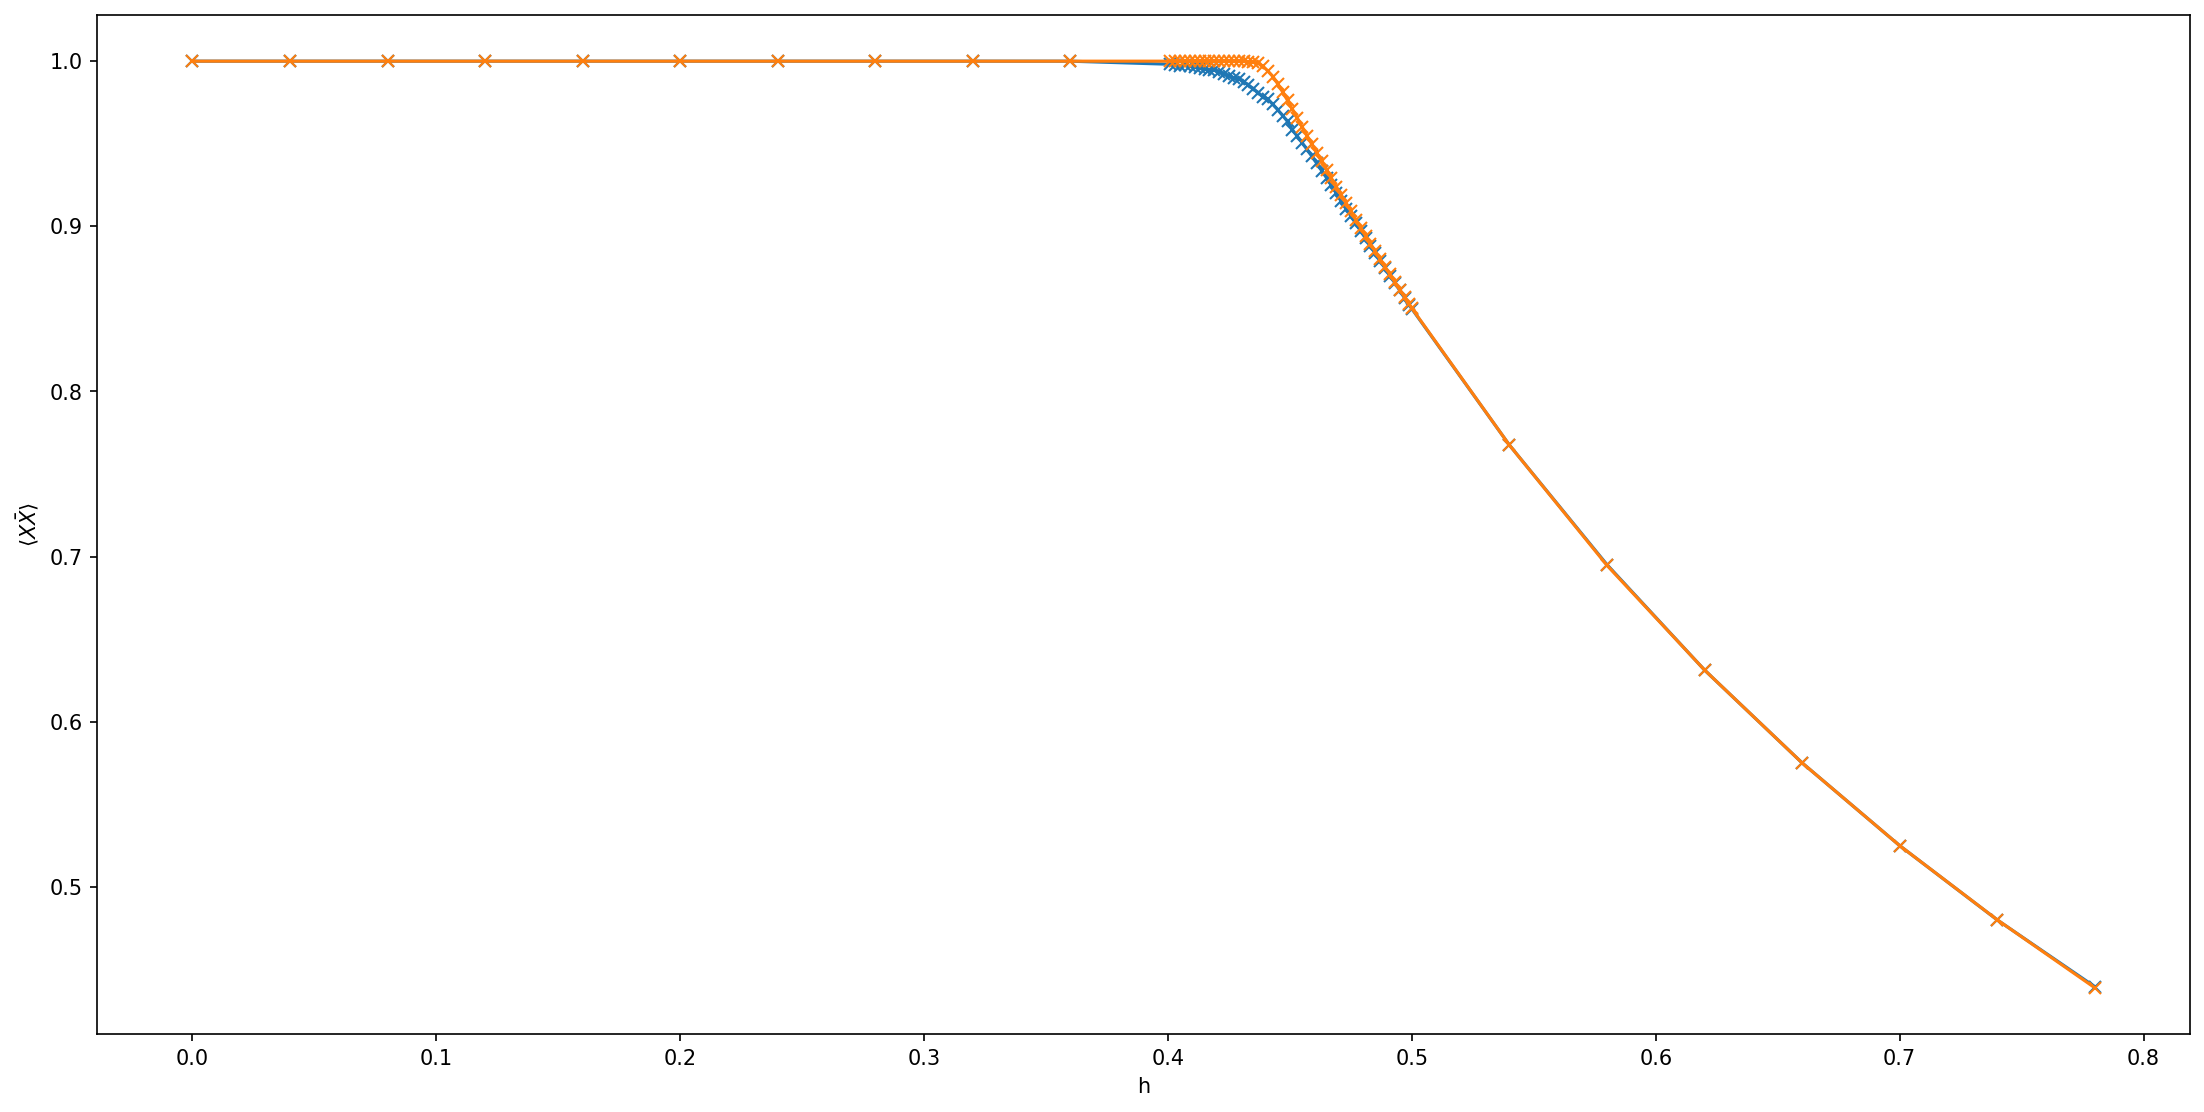

In [5]:
pyplot.figure(figsize=(18,9),dpi=150)
pyplot.plot(rng,lam1s,'-x')
pyplot.plot(rng,lam2s,'-x')
pyplot.xlabel('h')
pyplot.ylabel('$\langle X \\bar{X}\\rangle$')
#pyplot.plot(np.arange(0.401,0.5,0.002),lam3s)


In [9]:
h

0.45300000000000007

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


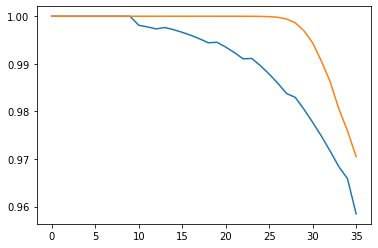

In [10]:
pyplot.plot(lam1s)
pyplot.plot(lam2s)
pyplot.plot(lam3s)



In [5]:
new_B,new_s = MPS_two_site.new_tensor(0)
B = np.tensordot(np.linalg.inv(new_s),new_B,([1],[0]))

In [ ]:
MPS9 = iMPS.iMPS()
MPS9.svd_threshold=1e-10
MPS9.construct_from_tensor_list([B])

In [7]:
trans = funcs.col_contract33(B,B)
lam,v = np.linalg.eig(trans)
print(lam[0])
lam,v = np.linalg.eig(trans/lam[0])
print(lam)

(7.859351512462657-2.663326221979956e-05j)
[ 0.99998516+5.98400307e-06j -0.59627935-5.15493613e-01j
  0.53187329-6.04718265e-01j  0.80730061+2.08436898e-06j
  0.53186747+6.04720192e-01j -0.59628436+5.15494892e-01j
 -0.73042687-1.97478040e-01j -0.73042736+1.97470785e-01j
  0.34670045-6.65802520e-01j -0.2134121 -6.70225773e-01j
 -0.03652219-7.02650886e-01j  0.34669989+6.65810991e-01j
  0.34877306-6.02008785e-01j -0.21341711+6.70227449e-01j
 -0.03652951+7.02652237e-01j  0.34876575+6.02010741e-01j
  0.45185294-4.90621151e-01j  0.45184822+4.90622080e-01j
  0.66656242+1.55650364e-06j  0.65697624-8.69878009e-02j
  0.65697663+8.69935072e-02j  0.09639322-6.43546172e-01j
  0.09640013+6.43538591e-01j -0.57301937-2.77016799e-01j
 -0.57302076+2.77007217e-01j -0.63314131+5.35254290e-02j
 -0.633148  -5.35306557e-02j -0.37513509+4.34288484e-01j
  0.16353551+5.93269375e-01j  0.16354083-5.93266390e-01j
  0.59452077+3.66957999e-02j  0.59451764-3.67037777e-02j
 -0.43662066+3.61675466e-01j -0.52329411+2.04

In [8]:
M = v[:,0].reshape([15,15])
funcs.is_hermitian_upto_a_phase(M)

True

In [6]:
MPS_two_site.El[0].shape

(16,)

In [7]:
MPS_two_site.Er[0].shape

(16,)

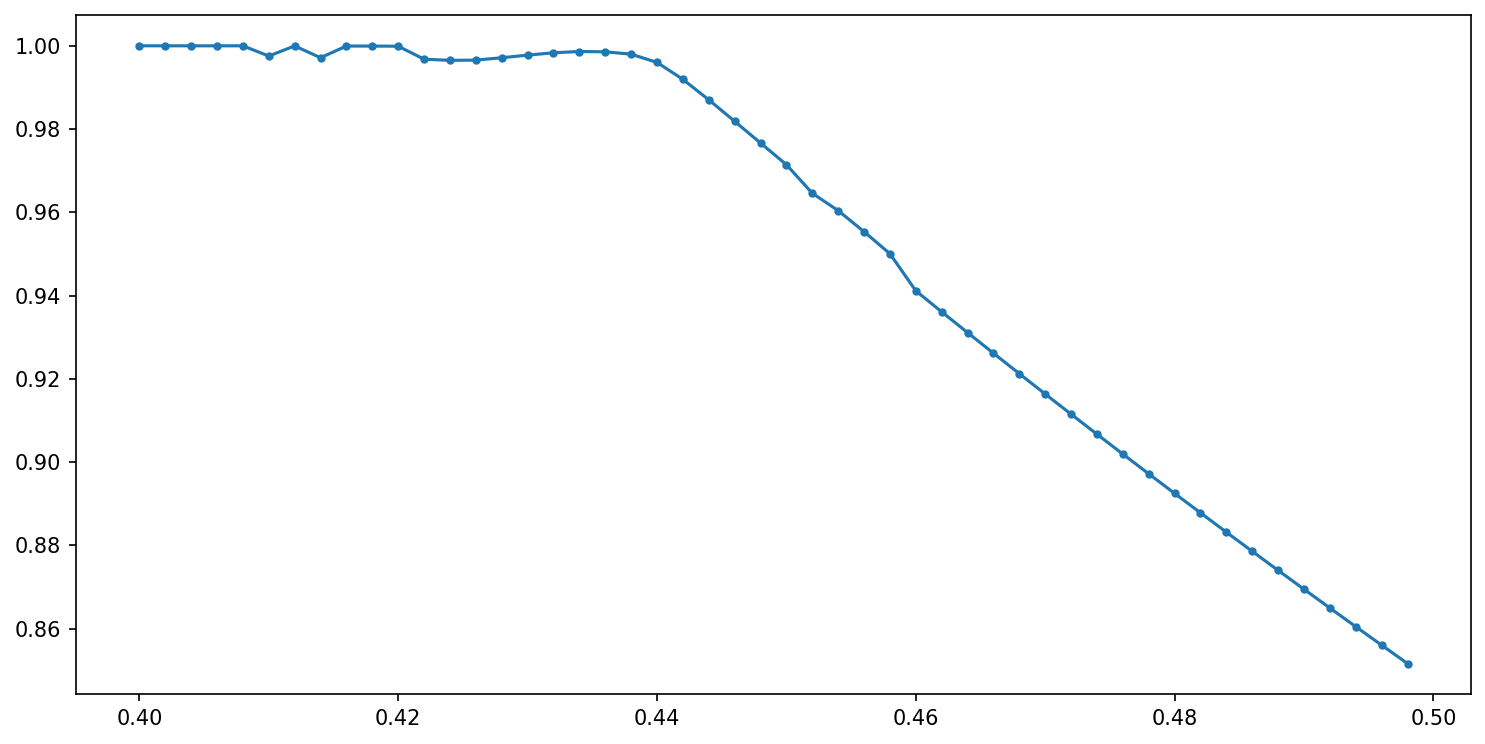

In [3]:
pyplot.figure(figsize=(12,6),dpi = 150)
#rng = np.arange(0.42,0.5,0.001)
#pyplot.plot(rng,k*rng+d)
#pyplot.plot(np.arange(0.4,0.5,0.001),lam1s,'.-',label = '$\langle X \\rangle$')
pyplot.plot(np.arange(0.4,0.5,0.002),lam4s,'.-',label = '$\langle \\bar{X}\\rangle$')
#pyplot.plot(np.arange(0.3,0.61,0.01),np.array(lam3s),'.-',label = '$\langle \\bar{X}\\rangle$')
#pyplot.plot(np.arange(0.2,0.7,0.01),np.array(lam1s),'.-',label = '$\langle \\bar{X}\\rangle$')
#pyplot.plot(np.arange(0.2,0.7,0.01),np.array(lam2s),'.-',label = '$\langle \\bar{X}\\rangle$')
#pyplot.plot(np.arange(0.2,0.7,0.01),np.array(lam3s),'.-',label = '$\langle \\bar{X}\\rangle$')
#pyplot.plot(np.arange(0.4,0.5,0.002),np.array(dims)/20,'.-',label = '$\langle \\bar{X}\\rangle$')
#pyplot.ylim([-0.1,1.2])

In [74]:
print(np.abs(lam1s))
print(np.abs(lam4s))

print(np.abs(lam2s))

print(np.abs(lam3s))

[0.84882294 0.67376402]
[0.99830689 0.97211502]
[0.77352441 0.76894655]
[0.82158389 0.76319381]


In [46]:
MPO1 = iMPS.iMPO()
T3 = np.zeros([1,1,4,4])
T3[0,0,:,:] = np.kron( np.eye(2),np.eye(2) )
MPO1.construct_from_tensor_list([T3,T3])
MPS_two_site = iMPS.MPS_power_method_twosite_update2(MPS,MPO1,20)
MPS_two_site.MPS2r = copy.deepcopy(MPS)
MPS_two_site.svd_threshold = 1e-6
MPS_two_site.init_MPS2()
MPS_two_site.init_env()
#MPS_two_site.update_MPS2(1)
#MPS_two_site.cell_svd_update(0)
s0 =np.diag(MPS_two_site.MPS1r.s[0])
s1 =np.diag(MPS_two_site.MPS1r.s[1])

T1 = funcs.row_contract33(funcs.row_contract32(MPS_two_site.MPS1l.B[0],s1),MPS_two_site.MPS1r.B[1])
T2 = funcs.row_contract33(MPS_two_site.MPS1r.B[0],MPS_two_site.MPS1r.B[1])

#print(np.linalg.norm(T1-T2))
#print(MPS_two_site.Er[0]/MPS_two_site.Er[0][0])
T3 = MPS_two_site.new_tensor(0).conj()

print(np.linalg.norm(T1-T3/T3[0,0,0,0]*T1[0,0,0,0]))


new_M = T1
new_M = np.transpose(new_M,[0,2,1,3])
w = np.shape(new_M)
            
new_M = new_M.reshape([w[0]*w[1],w[2]*w[3]])
            
U,lam,V = np.linalg.svd(new_M)
dim = np.sum(lam>1e-10)

U = U[:,:dim]
lam = lam[:dim]
V = V[:dim,:]
lam = lam/np.linalg.norm(lam)
            
B_new_left = np.reshape(U@np.diag(lam),[-1,4,dim])
B_new_left  = np.transpose(B_new_left ,[0,2,1])
B_new_left  = funcs.row_contract23(np.linalg.inv(s0),B_new_left)
        
B_new_right = np.reshape(V,[dim,-1,4])





T4 = funcs.row_contract33(B_new_left,B_new_right)
print(np.linalg.norm(T4*T2[0,0,0,0]/T4[0,0,0,0]-T2))
MPS1 = iMPS.iMPS()
MPS1.construct_from_tensor_list([B_new_left,B_new_right])
strap4 = iMPS.strap(MPS1,MPO4,MPS1)
lam4 = strap4.calculate_eig()


print(abs(lam4))


3.007313619285421e-13
2.384481459025009e-15
0.9999988243956888


In [50]:
np.diag(s1)-lam

array([-5.55111512e-16,  3.88578059e-16,  2.22911967e-16,  2.17924637e-17])

In [52]:
U1=np.reshape(U,[-1,4,dim])
U1 = np.transpose(U1,[0,2,1])
print(np.tensordot(U1,U1.conj(),([0,2],[0,2])))

[[ 1.00000000e+00+0.00000000e+00j  1.54532691e-16-2.02610281e-18j
   7.93432702e-17+2.26327204e-18j -1.38777878e-17+0.00000000e+00j]
 [ 1.54532691e-16+2.02610281e-18j  1.00000000e+00+0.00000000e+00j
   5.55111512e-17+2.77555756e-17j  3.87195701e-17+1.14518854e-18j]
 [ 7.93432702e-17-2.26327204e-18j  5.55111512e-17-2.77555756e-17j
   1.00000000e+00+0.00000000e+00j -1.77897248e-16-6.33377357e-17j]
 [-1.38777878e-17+0.00000000e+00j  3.87195701e-17-1.14518854e-18j
  -1.77897248e-16+6.33377357e-17j  1.00000000e+00+0.00000000e+00j]]


In [ ]:
U1/U1[0,0,0]-MPS_two_site.MPS1l.B[0] /MPS_two_site.MPS1l.B[0][0,0,0]

In [56]:
M = MPS_two_site.MPS1l.B[0] 

M = np.transpose(M,[0,2,1])
M = M.reshape([16,4])
u1,s1,v1 = np.linalg.svd(M)



u2,s2,v2 = np.linalg.svd(U)

In [ ]:
u1/u1[0,0]-u2/u2[0,0]

In [16]:
np.linalg.eig((MPS_two_site.El[1]/(MPS_two_site.El[1][0])).reshape([3,3]))

(array([ 1.00000017+5.43107399e-07j,  0.68766854-6.79287784e-01j,
        -0.99991887-1.27565723e-02j]),
 array([[ 9.99999616e-01+0.j        , -7.97209179e-04-0.00033529j,
          1.80432680e-06+0.00013799j],
        [ 1.29487888e-08+0.00012301j,  5.43416522e-03-0.0165351j ,
          9.99848511e-01+0.j        ],
        [ 8.48158562e-04-0.0001803j ,  9.99848145e-01+0.j        ,
         -5.38530670e-03-0.01655096j]]))

In [75]:
MPO1 = iMPS.iMPO()
T3 = np.zeros([1,1,4,4])
T3[0,0,:,:] = np.kron( np.eye(2),np.eye(2) )
MPO1.construct_from_tensor_list([T3,T3])

MPS_two_site = iMPS.MPS_power_method_twosite_update2(MPS,MPO1,20)
print(MPS.chi)

MPS_two_site.MPS2r = copy.deepcopy(MPS)
MPS_two_site.svd_threshold = 1e-6
MPS_two_site.init_MPS2()
MPS_two_site.init_env()

for _ in range(30):
    s0 =np.diag(MPS_two_site.MPS1r.s[0])
    s1 =np.diag(MPS_two_site.MPS1r.s[1])

    T1 = funcs.row_contract33(funcs.row_contract32(MPS_two_site.MPS1l.B[0],s1),MPS_two_site.MPS1r.B[1])
    T2 = funcs.row_contract33(MPS_two_site.MPS1r.B[0],MPS_two_site.MPS1r.B[1])

    #print(np.linalg.norm(T1-T2))
    #print(MPS_two_site.Er[0]/MPS_two_site.Er[0][0])
    """T3 = MPS_two_site.new_tensor(0).conj()

    print(np.linalg.norm(T1-T3/T3[0,0,0,0]*T1[0,0,0,0]))
    """
    MPS8 = iMPS.iMPS()
    s0 = np.diag(MPS_two_site.MPS2l.s[0])
    s1 = np.diag(MPS_two_site.MPS2l.s[1])
    MPS8.construct_from_tensor_list([MPS_two_site.MPS2r.B[0],MPS_two_site.MPS2r.B[1]])
    strap4 = iMPS.strap(MPS_two_site.MPS2l,None,MPS)
    lam4 = strap4.calculate_eig()
    print(abs(lam4))
    print(MPS_two_site.MPS2r.chi)
    MPS_two_site.update_MPS2(loop=30)

"""#B1_new,lam,B2_new = MPS_two_site.two_site_svd(0)
new_M = T3
new_M = np.transpose(new_M,[0,2,1,3])
w = np.shape(new_M)
            
new_M = new_M.reshape([w[0]*w[1],w[2]*w[3]])
            
U,lam,V = np.linalg.svd(new_M)
dim = np.sum(lam>1e-10)

U = U[:,:dim]
lam = lam[:dim]
V = V[:dim,:]
lam = lam/np.linalg.norm(lam)
            
B_new_left = np.reshape(U@np.diag(lam),[-1,4,dim])
B_new_left  = np.transpose(B_new_left ,[0,2,1])
B_new_left  = funcs.row_contract23(np.linalg.inv(s0),B_new_left)
        
B_new_right = np.reshape(V,[dim,-1,4])





T4 = funcs.row_contract33(B_new_left,B_new_right)
print(np.linalg.norm(T4*T2[0,0,0,0]/T4[0,0,0,0]-T2))
MPS1 = iMPS.iMPS()
MPS1.construct_from_tensor_list([B_new_left,B_new_right])
strap4 = iMPS.strap(MPS1,MPO4,MPS1)
lam4 = strap4.calculate_eig()
print(abs(lam4))"""

[6 6]
1.0000000000000013
[6 6]
0.7700955732573103
[6 6]
0.954301347637691
[6 6]
0.9192866351352722
[6 6]
0.691242588601658
[6 6]
0.9965024134113424
[6 6]
0.9267229540219823
[6 6]
0.9771898170193765
[6 6]
0.9087889768753858
[6 6]
0.9837784400384071
[6 6]
0.9823041159749556
[6 6]
0.8276055241335436
[6 6]
0.9389565045637933
[6 6]
0.9912773091024769
[6 6]
0.9864144651252351
[6 6]
0.8999036367266307
[6 6]
0.9903252203744939
[6 6]
0.9236775427376128
[6 6]
0.9182436640408345
[6 6]
0.8821811537101236
[6 6]
0.977238773176842
[6 6]
0.9382020077979748
[6 6]
0.8405132801233236
[6 6]
0.9954022301026809
[6 6]
0.8033232547695748
[6 6]
0.9473360047745644
[6 6]
0.9731516239706974
[6 6]
0.7922406770709424
[6 6]
0.7987995860468936
[6 6]
0.9747534418649874
[6 6]


'#B1_new,lam,B2_new = MPS_two_site.two_site_svd(0)\nnew_M = T3\nnew_M = np.transpose(new_M,[0,2,1,3])\nw = np.shape(new_M)\n            \nnew_M = new_M.reshape([w[0]*w[1],w[2]*w[3]])\n            \nU,lam,V = np.linalg.svd(new_M)\ndim = np.sum(lam>1e-10)\n\nU = U[:,:dim]\nlam = lam[:dim]\nV = V[:dim,:]\nlam = lam/np.linalg.norm(lam)\n            \nB_new_left = np.reshape(U@np.diag(lam),[-1,4,dim])\nB_new_left  = np.transpose(B_new_left ,[0,2,1])\nB_new_left  = funcs.row_contract23(np.linalg.inv(s0),B_new_left)\n        \nB_new_right = np.reshape(V,[dim,-1,4])\n\n\n\n\n\nT4 = funcs.row_contract33(B_new_left,B_new_right)\nprint(np.linalg.norm(T4*T2[0,0,0,0]/T4[0,0,0,0]-T2))\nMPS1 = iMPS.iMPS()\nMPS1.construct_from_tensor_list([B_new_left,B_new_right])\nstrap4 = iMPS.strap(MPS1,MPO4,MPS1)\nlam4 = strap4.calculate_eig()\nprint(abs(lam4))'

In [10]:
MPS_two_site.MPS2l.site_canonical()

In [12]:
transl = MPS_two_site.MPS2r.transfer_matrix('left')
transl

<25x25 _ProductLinearOperator with dtype=complex128>

In [13]:
lam,v = np.linalg.eig(transl.adjoint().dot(np.eye(25)))
lam

array([ 1.00000000e+00+3.48790256e-18j,  2.42731990e-01-4.71328633e-17j,
        2.12357637e-01+1.34340304e-16j,  1.25989910e-01-1.42544870e-18j,
        6.91156327e-02-2.61474730e-18j, -4.31006743e-02+1.61347764e-02j,
       -4.31006743e-02-1.61347764e-02j,  4.78999509e-02-6.24714981e-18j,
       -2.47056427e-02+1.02734740e-02j, -2.47056427e-02-1.02734740e-02j,
        3.27125119e-02+1.32439902e-17j,  2.87745565e-02+6.26424752e-03j,
        2.87745565e-02-6.26424752e-03j,  2.91114201e-02+1.75035209e-18j,
       -6.16912097e-03+3.31924109e-03j, -6.16912097e-03-3.31924109e-03j,
        9.03624276e-03+1.32851931e-17j,  6.25257729e-03-6.66434283e-04j,
        6.25257729e-03+6.66434283e-04j,  6.18650838e-03-3.76386802e-18j,
       -1.00998949e-03+7.42577847e-04j, -1.00998949e-03-7.42577847e-04j,
        1.49845341e-03+6.81691429e-04j,  1.49845341e-03-6.81691429e-04j,
        8.41380061e-04+9.38175964e-19j])

In [14]:
vl = v[:,0].reshape([5,5])
funcs.is_hermitian_upto_a_phase(vl)

True

In [15]:
np.random.seed(2)
A = np.random.random([5,5])
A =A+A.transpose()
A = A/np.linalg.norm(A)

In [16]:
lam,v = sparse.linalg.eigs(transl.adjoint(),3,v0 = A.reshape([25,]))
lam

array([1.        +8.40301257e-19j, 0.24273199+1.20162326e-16j,
       0.21235764-2.09818860e-16j])

In [42]:
MPS_two_site.MPS2l.B[0].shape

(4, 4, 4)

In [ ]:
MPS_two_site.MPS1l.B[0][:,:3,:]/MPS_two_site.MPS1l.B[0][0,0,0]

In [ ]:
B_new_left[:,:3,:]/B_new_left[0,0,0]

In [ ]:
MPS_two_site.MPS1l.B[0][:,:4,:]/MPS_two_site.MPS1l.B[0][0,0,0]-B_new_left[:,:4,:]/B_new_left[0,0,0]

In [15]:
MPS1 = iMPS.iMPS()
MPS1.construct_from_tensor_list([B_new_right[:4,:,:]])

MPS2 = iMPS.iMPS()
MPS2.construct_from_tensor_list([MPS_two_site.MPS1r.B[0][:4,:,:]])

strap = iMPS.strap(MPS1,MPO = None,MPS2=MPS1)
print(abs(strap.calculate_eig()))
strap = iMPS.strap(MPS2,MPO = None,MPS2=MPS2)
print(abs(strap.calculate_eig()))
strap = iMPS.strap(MPS1,MPO = None,MPS2=MPS2)
print(abs(strap.calculate_eig()))

1.0000000000000007
1.0000000000000018
0.9914887292385939


In [14]:
np.linalg.eig((MPS1.B[0]/MPS1.B[0][0,0,0]-MPS2.B[0]/MPS2.B[0][0,0,0])[:,:,3])

(array([-0.93271333+0.56968439j,  0.01278519+0.06610382j,
        -0.14762512+0.16472698j, -0.12835112+0.25992883j]),
 array([[ 1.72603339e-03+0.00239108j,  1.04616929e-02-0.03076372j,
         -3.38982884e-03+0.00124647j,  1.88549543e-04+0.00132374j],
        [ 3.14602086e-01+0.07521469j,  4.05671693e-02-0.01896337j,
         -1.55039410e-03-0.00421524j,  2.62157777e-03-0.00260507j],
        [-4.91407596e-01-0.14923381j,  3.93080640e-01+0.02250958j,
          5.33147333e-02-0.13343362j, -5.19270603e-02-0.01798423j],
        [ 7.94737332e-01+0.j        ,  9.17561862e-01+0.j        ,
          9.89605877e-01+0.j        ,  9.98481197e-01+0.j        ]]))

In [13]:
np.linalg.eig((MPS1.B[0]/MPS1.B[0][0,0,0]-MPS2.B[0]/MPS2.B[0][0,0,0])[:,:,3])

(array([-0.93070313+0.5679463j ,  0.01268056+0.06598344j,
        -0.14741288+0.1652505j , -0.1280139 +0.25979722j]),
 array([[ 1.71544601e-03+0.00241043j,  1.08305677e-02-0.03078749j,
         -3.39698670e-03+0.00122712j,  1.59221333e-04+0.00133609j],
        [-3.14994276e-01-0.07591464j, -4.09747019e-02+0.01872691j,
          1.55305998e-03+0.00426109j, -2.58764284e-03+0.00260578j],
        [ 4.91526884e-01+0.15223269j, -3.93002264e-01-0.02736462j,
         -5.40585372e-02+0.13359993j,  5.19880760e-02+0.01948589j],
        [ 7.93872377e-01+0.j        ,  9.17445151e-01+0.j        ,
          9.89542884e-01+0.j        ,  9.98449920e-01+0.j        ]]))

In [55]:
np.random.seed(1)
A = np.random.random([4,4])+ np.random.random([4,4])*1j
A

array([[4.17022005e-01+0.4173048j , 7.20324493e-01+0.55868983j,
        1.14374817e-04+0.14038694j, 3.02332573e-01+0.19810149j],
       [1.46755891e-01+0.80074457j, 9.23385948e-02+0.96826158j,
        1.86260211e-01+0.31342418j, 3.45560727e-01+0.69232262j],
       [3.96767474e-01+0.87638915j, 5.38816734e-01+0.89460666j,
        4.19194514e-01+0.08504421j, 6.85219500e-01+0.03905478j],
       [2.04452250e-01+0.16983042j, 8.78117436e-01+0.8781425j ,
        2.73875932e-02+0.09834683j, 6.70467510e-01+0.42110763j]])

In [56]:
A = A+A.transpose().conj()
A = A*0.5j
print(A)

[[ 0.        +0.417022j    0.12102737+0.43354019j  0.36800111+0.19844092j
  -0.01413553+0.25339241j]
 [-0.12102737+0.43354019j  0.        +0.09233859j  0.29059124+0.36253847j
   0.09290994+0.61183908j]
 [-0.36800111+0.19844092j -0.29059124+0.36253847j  0.        +0.41919451j
   0.02964603+0.35630355j]
 [ 0.01413553+0.25339241j -0.09290994+0.61183908j -0.02964603+0.35630355j
   0.        +0.67046751j]]


In [57]:
theta=funcs.find_phase(A)

In [58]:
A/theta

array([[0.5       +0.j        , 0.51980494-0.14510909j,
        0.2379262 -0.44122505j, 0.3038118 +0.01694819j],
       [0.51980494+0.14510909j, 0.1107119 +0.j        ,
        0.43467547-0.34841236j, 0.73358129-0.11139693j],
       [0.2379262 +0.44122505j, 0.43467547+0.34841236j,
        0.50260479+0.j        , 0.42719994-0.03554492j],
       [0.3038118 -0.01694819j, 0.73358129+0.11139693j,
        0.42719994+0.03554492j, 0.80387546+0.j        ]])